In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow_addons as tfa
import joblib

C:\Users\aswin\anaconda3\envs\myenv_tf\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### Data Collection

In [2]:
df = pd.read_excel("Housing.xlsx")

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4.0,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3.0,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4.0,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4.0,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3.0,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2.0,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3.0,1,1,no,no,no,no,no,0,no,furnished


### EDA

In [3]:
df.dtypes

price                 int64
area                  int64
bedrooms            float64
bathrooms             int64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

In [4]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

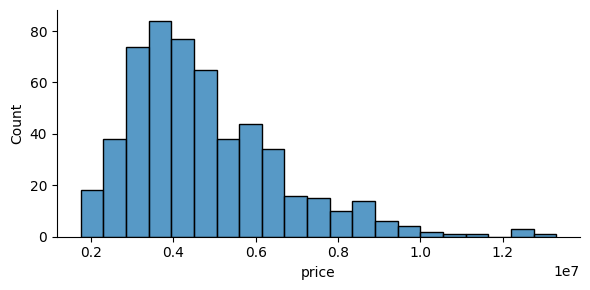

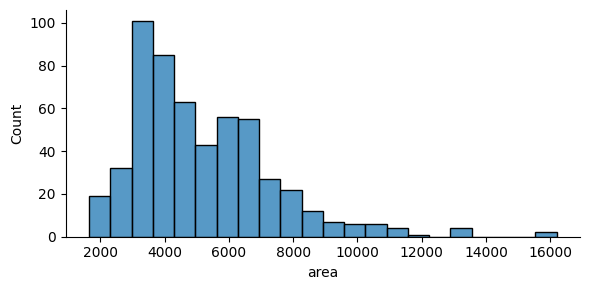

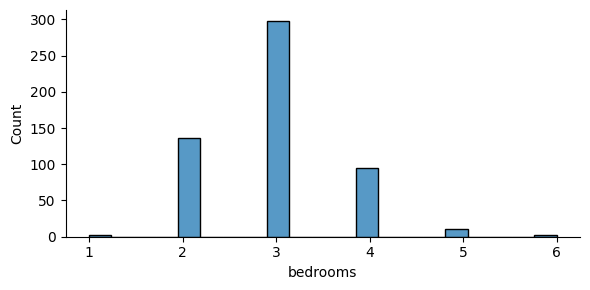

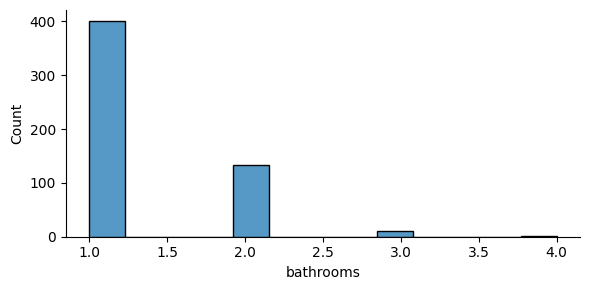

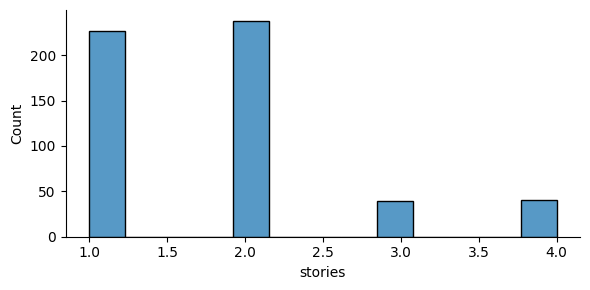

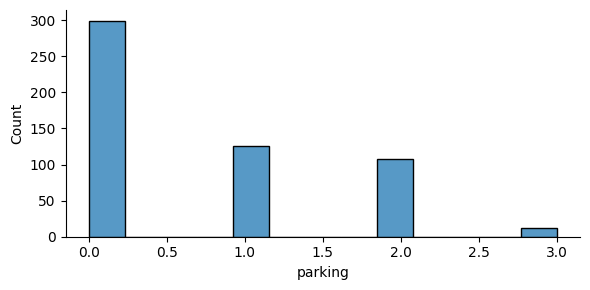

In [5]:
for column in numerical_columns:
    sns.displot(df, x=column, height=3, aspect=2)

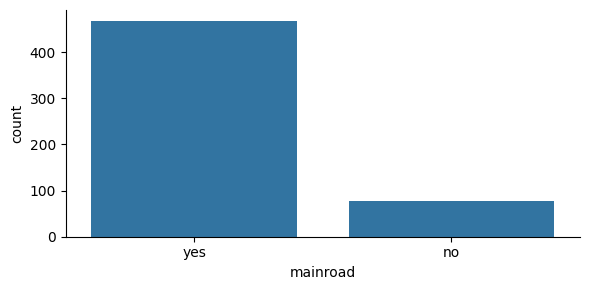

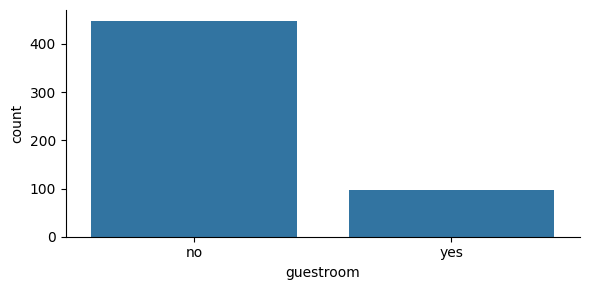

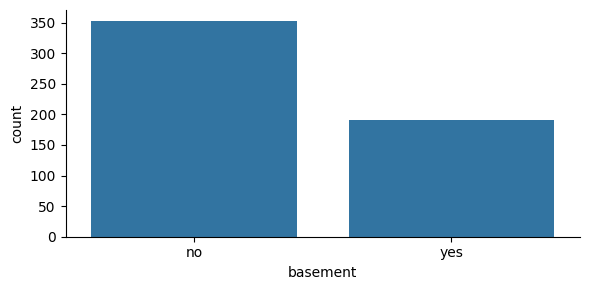

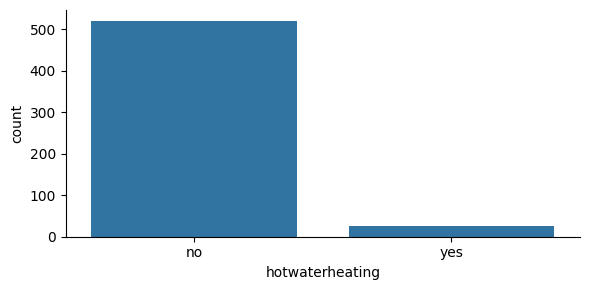

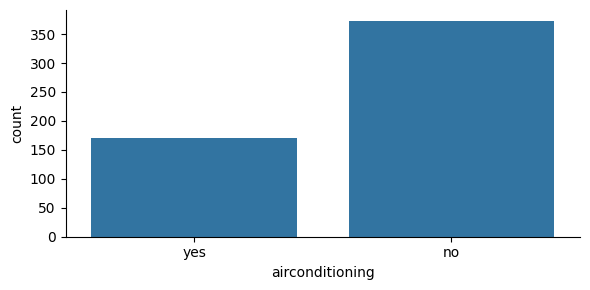

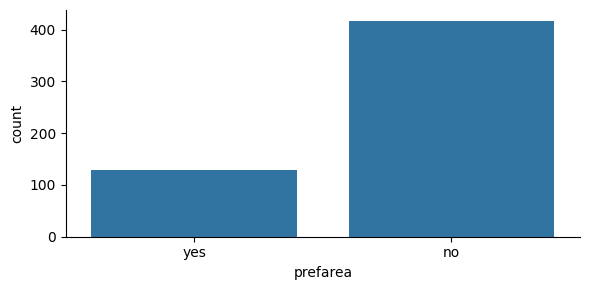

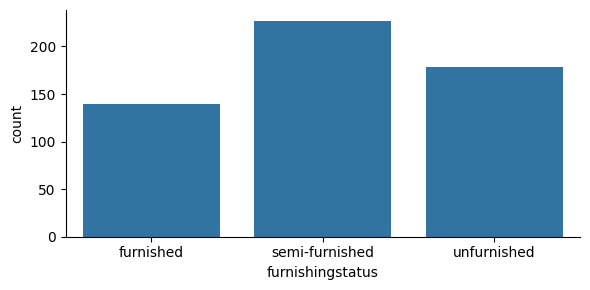

In [6]:
for column in categorical_columns:
    sns.catplot(df, x=column, kind='count', height=3, aspect=2)

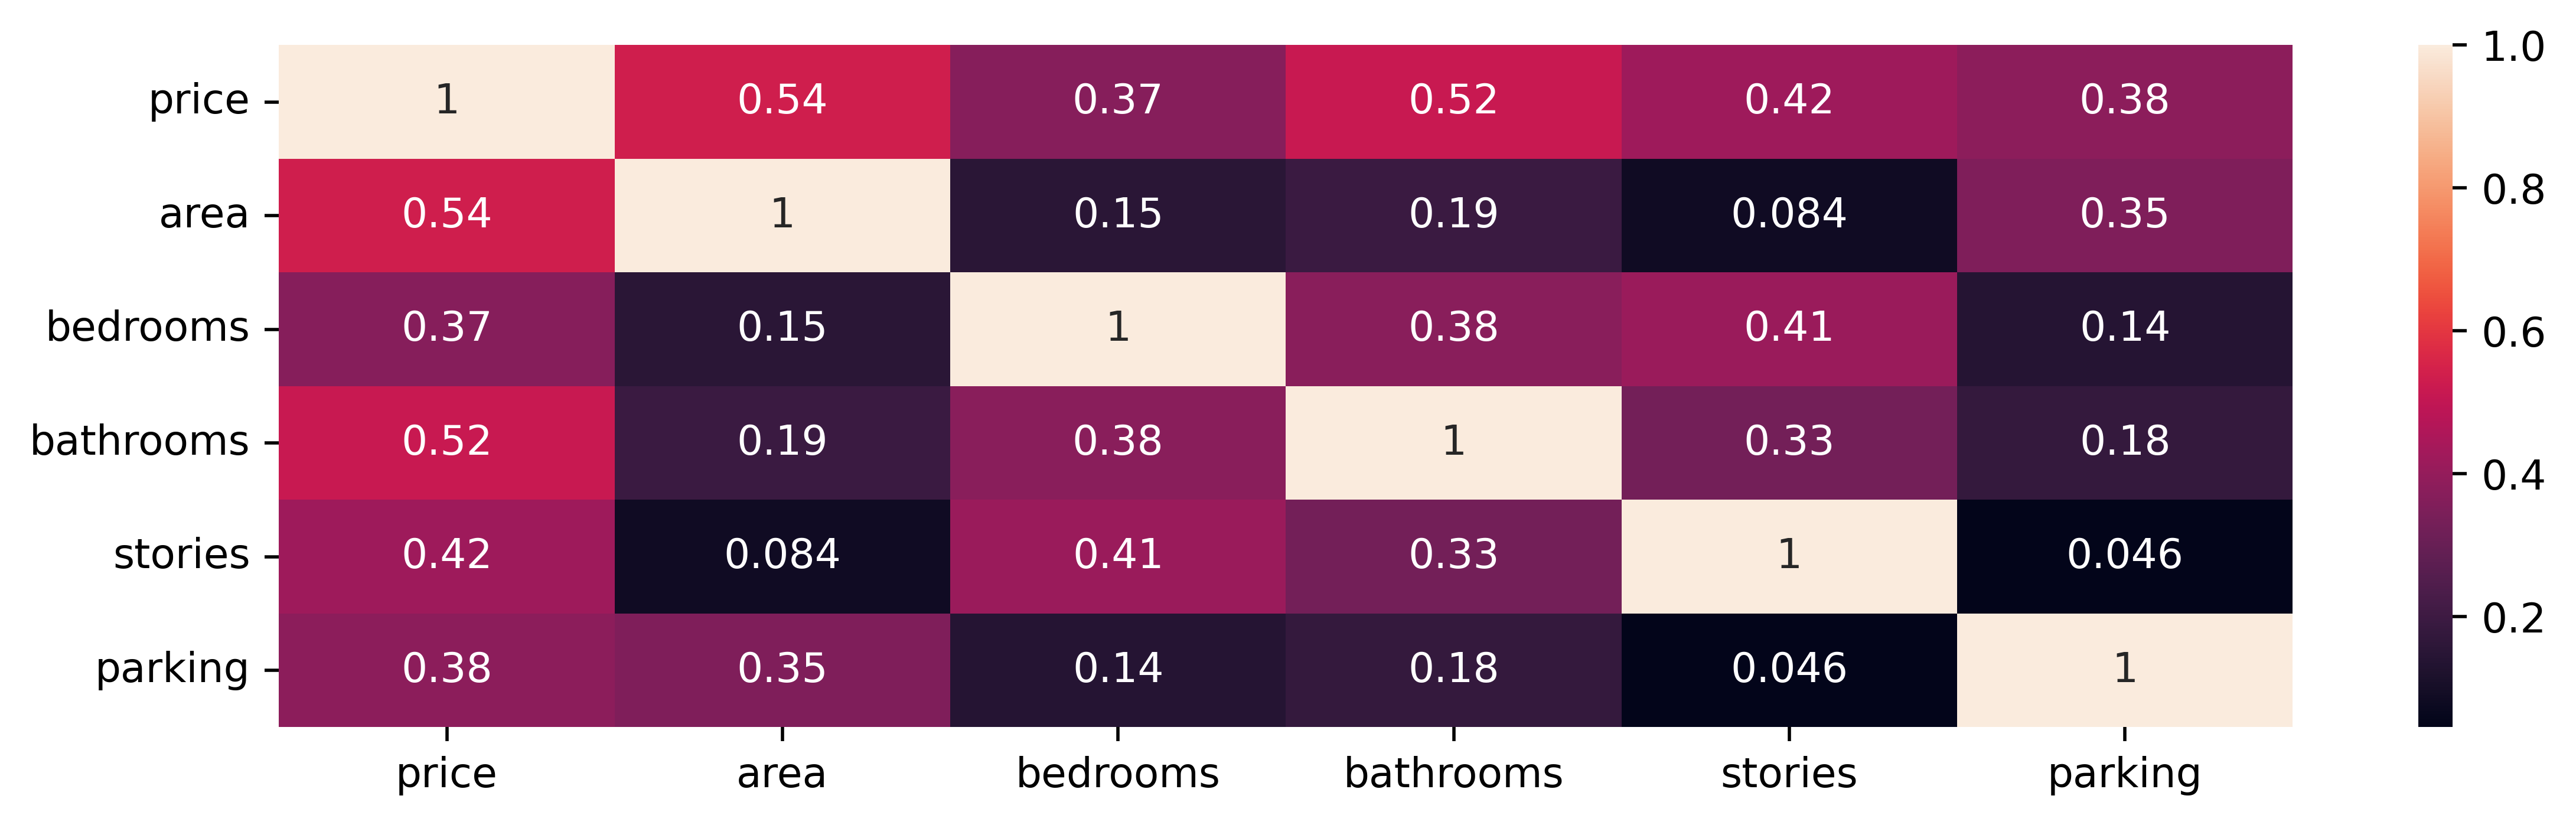

In [7]:
# correlation plot
correlation_matrix = df[numerical_columns].corr()

# display chart
plt.figure(figsize=(11,3), dpi=500)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,543.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965009,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.739421,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.isna().sum()

price               0
area                0
bedrooms            2
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            1
hotwaterheating     0
airconditioning     1
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
df.dropna(subset=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'], inplace=True)

### Data Split

In [11]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [12]:
# feature selection
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

# update list of numerical cols and categorical cols
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# target selection
y = df['price']

In [13]:
# train rest split
X_train, X_rest, y_train, y_rest = train_test_split(X, y, train_size=0.80, random_state=42)

# val test split
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.50, random_state=42)

# print percentage of sets
print(f'Percentage of Train Set {X_train.shape[0]/X.shape[0]: .2f}')
print(f'Percentage of Val Set {X_val.shape[0]/X.shape[0]: .2f}')
print(f'Percentage of Set Set {X_test.shape[0]/X.shape[0]: .2f}')

Percentage of Train Set  0.80
Percentage of Val Set  0.10
Percentage of Set Set  0.10


### Data Preprocessing

In [14]:
# convert target to numpy array
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [15]:
# scaling numerical features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_val_scaled = scaler.fit_transform(X_val[numerical_columns])
X_test_scaled = scaler.fit_transform(X_test[numerical_columns])

In [16]:
# encoding categorical features
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_val_encoded = encoder.fit_transform(X_val[categorical_columns])
X_test_encoded = encoder.fit_transform(X_test[categorical_columns])

In [17]:
# horizontal stack numerical and cateogorical cols
X_train = np.hstack((X_train_scaled, X_train_encoded))
X_val = np.hstack((X_val_scaled, X_val_encoded))
X_test = np.hstack((X_test_scaled, X_test_encoded))

### Model Training and Testing

In [24]:
# model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1], )),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Define metrics
mae = tf.keras.metrics.MeanAbsoluteError()
mse = tf.keras.metrics.MeanSquaredError()
rmse = tf.keras.metrics.RootMeanSquaredError()
r2 = tfa.metrics.RSquare()

# Compile the model
model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=[r2])

# Fit the model
model.fit(X_train, y_train, epochs=30, batch_size=30, validation_data=(X_val, y_val))

Epoch 1/30
15/15 [==============================] - 1s 9ms/step - loss: 4656609.0000 - r_square: -7.1274 - val_loss: 5117769.5000 - val_r_square: -6.0033
Epoch 2/30
15/15 [==============================] - 0s 3ms/step - loss: 4656572.5000 - r_square: -7.1273 - val_loss: 5117645.5000 - val_r_square: -6.0030
Epoch 3/30
15/15 [==============================] - 0s 2ms/step - loss: 4656140.0000 - r_square: -7.1259 - val_loss: 5116395.5000 - val_r_square: -6.0000
Epoch 4/30
15/15 [==============================] - 0s 3ms/step - loss: 4652714.0000 - r_square: -7.1152 - val_loss: 5107863.5000 - val_r_square: -5.9795
Epoch 5/30
15/15 [==============================] - 0s 2ms/step - loss: 4633365.5000 - r_square: -7.0547 - val_loss: 5065576.5000 - val_r_square: -5.8785
Epoch 6/30
15/15 [==============================] - 0s 3ms/step - loss: 4550674.0000 - r_square: -6.8031 - val_loss: 4903139.5000 - val_r_square: -5.4981
Epoch 7/30
15/15 [==============================] - 0s 2ms/step - loss: 4266

In [22]:
test_loss, test_score = model.evaluate(X_test, y_test)

print(f"Test Loss is {test_loss: .3f}")
print(f"Test Score is {test_score: .3f}")

2/2 [==============================] - 0s 4ms/step - loss: 1424023.2500 - r_square: 0.2209
Test Loss is  1424023.250
Test Score is  0.221


### Model Save

In [23]:
# Save preprocessing steps
joblib.dump(scaler, 'Scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

# Save model
joblib.dump(model, 'model.pkl')

print('Model Saved Successfully!')

Model Saved Successfully!
